# Load Libraries

In [2]:
library(tidyverse)
library(dplyr)
library(GGally)
library(caTools)
library(MLmetrics)
library(caret)

# Read data

In [3]:
life <- read.csv("../input/life-expectancy-who/Life Expectancy Data.csv")
summary(life)

   Country               Year         Status          Life.expectancy
 Length:2938        Min.   :2000   Length:2938        Min.   :36.30  
 Class :character   1st Qu.:2004   Class :character   1st Qu.:63.10  
 Mode  :character   Median :2008   Mode  :character   Median :72.10  
                    Mean   :2008                      Mean   :69.22  
                    3rd Qu.:2012                      3rd Qu.:75.70  
                    Max.   :2015                      Max.   :89.00  
                                                      NA's   :10     
 Adult.Mortality infant.deaths       Alcohol        percentage.expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:228.0   3rd Qu.:  22.0   3rd Qu.: 7.7025   3rd Qu.:  441

In [4]:
str(life)

'data.frame':	2938 obs. of  22 variables:
 $ Country                        : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : chr  "Developing" "Developing" "Developing" "Developing" ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : int  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7

# Dropping the NaN values

In [5]:
life <- life %>% drop_na()

In [6]:
range(life$Life.expectancy)

[1] 44 89

# Removing the variables which are not numeric

In [7]:
life_selected <- life %>% select(-Country, -Year, -Status)

# Split the dataset into 80% train and 20% test

In [8]:
split=sample.split(life_selected, SplitRatio=0.8)
train<-subset(life_selected,split==TRUE)       
test<-subset(life_selected,split==FALSE)

# Fitting Linear Regression model on original data (numeric variables only)


Call:
lm(formula = Life.expectancy ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4059  -2.0837   0.0211   2.1586  12.0152 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.411e+01  8.303e-01  65.164  < 2e-16 ***
Adult.Mortality                 -1.729e-02  1.095e-03 -15.782  < 2e-16 ***
infant.deaths                    9.037e-02  1.177e-02   7.681 3.12e-14 ***
Alcohol                         -3.144e-02  3.429e-02  -0.917   0.3594    
percentage.expenditure           3.596e-04  1.964e-04   1.831   0.0673 .  
Hepatitis.B                     -3.326e-03  5.059e-03  -0.657   0.5111    
Measles                         -1.301e-05  1.268e-05  -1.025   0.3054    
BMI                              3.553e-02  6.881e-03   5.164 2.81e-07 ***
under.five.deaths               -6.836e-02  8.607e-03  -7.943 4.29e-15 ***
Polio                            8.251e-03  5.695e-03   1.449   0.1476    
T

Method,Error.Value
<chr>,<dbl>
RMSE,3.577784


`geom_smooth()` using formula 'y ~ x'



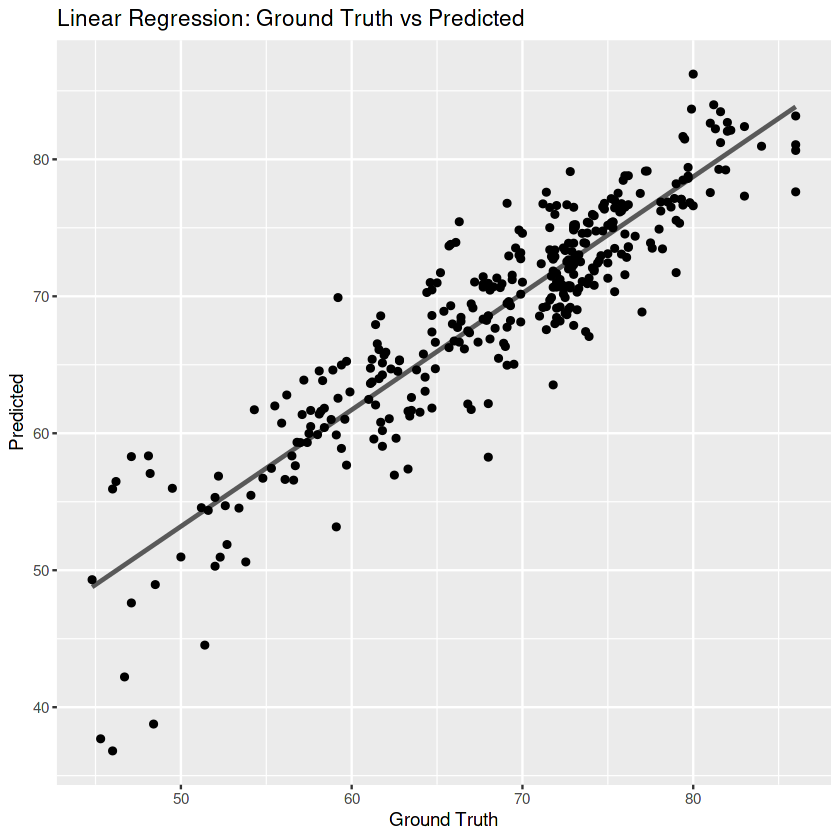

In [9]:
life_model <- lm(formula = Life.expectancy ~., data = train)
summary(life_model)

life_pred <- predict(life_model, train)
data.frame(Method = "RMSE", 
           Error.Value = RMSE(life_pred, train$Life.expectancy))
           
ypred <- predict(life_model, newdata = test)

ggplot (data = test, aes (x=Life.expectancy,y=ypred)) +
  geom_smooth(se=F,method = "lm",colour = "gray35") + geom_point() +
  ggtitle('Linear Regression: Ground Truth vs Predicted') +
  xlab('Ground Truth') +
  ylab('Predicted')

# Correlation between variables

In [10]:
data_num <- life_selected %>% select_if(is.numeric)

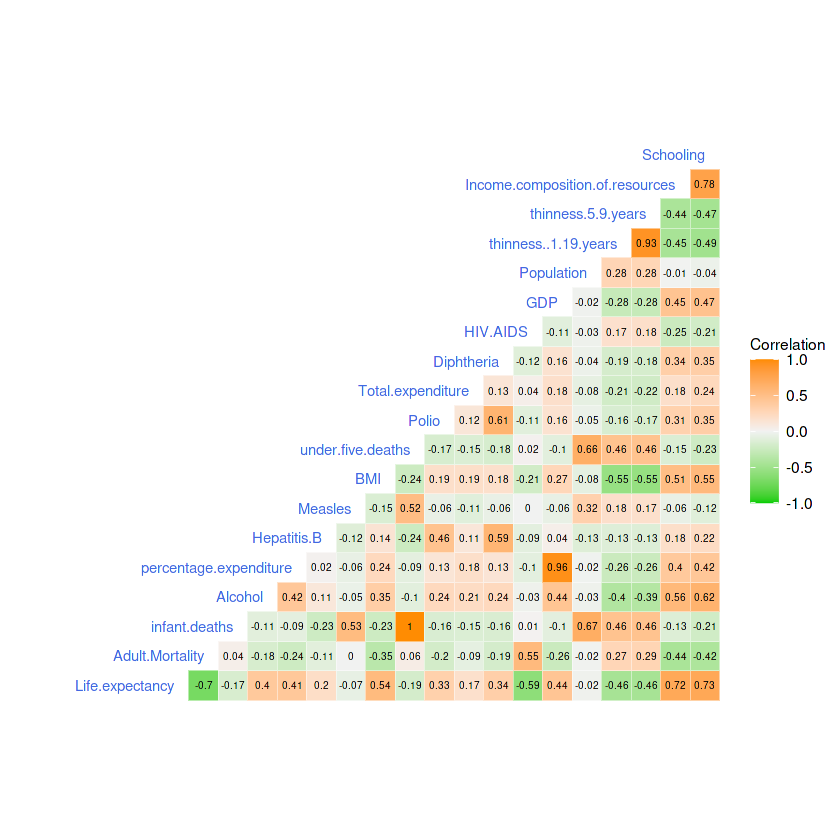

In [11]:
ggcorr(data_num, 
       label = T, 
       label_size = 2,
       label_round = 2,
       hjust = 1,
       size = 3, 
       color = "royalblue",
       layout.exp = 5,
       low = "green3", 
       mid = "gray95", 
       high = "darkorange",
       name = "Correlation")

# Removing the variables which are correlated to life expectency greater than -0.2 and less than 0.2

In [12]:
#removing correlated 
life_selected <- life_selected %>% 
  select(-Population, -Measles, -infant.deaths, 
         -under.five.deaths, -Total.expenditure)

# Split the dataset into 80% train and 20% test

In [13]:
split=sample.split(life_selected, SplitRatio=0.8)
train<-subset(life_selected,split==TRUE)       
test<-subset(life_selected,split==FALSE)

# All variables

In [24]:
life_model <- lm(formula = Life.expectancy ~., data = train)
summary(life_model)


Call:
lm(formula = Life.expectancy ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.700  -2.115   0.112   2.393  10.759 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.203e+01  8.078e-01  64.405  < 2e-16 ***
Adult.Mortality                 -1.771e-02  1.055e-03 -16.789  < 2e-16 ***
Alcohol                         -1.271e-01  3.443e-02  -3.691 0.000233 ***
percentage.expenditure           3.970e-04  2.022e-04   1.963 0.049822 *  
Hepatitis.B                     -7.063e-03  5.007e-03  -1.411 0.158632    
BMI                              3.879e-02  7.006e-03   5.537 3.74e-08 ***
Polio                            8.150e-03  6.047e-03   1.348 0.178012    
Diphtheria                       2.473e-02  6.789e-03   3.643 0.000280 ***
HIV.AIDS                        -4.316e-01  1.958e-02 -22.046  < 2e-16 ***
GDP                              1.182e-05  3.175e-05   0.372 0.709687    
thinness..1

In [25]:
life_pred <- predict(life_model, train)
data.frame(Method = "RMSE", 
           Error.Value = RMSE(life_pred, train$Life.expectancy))

Method,Error.Value
<chr>,<dbl>
RMSE,3.670546


In [26]:
ypred <- predict(life_model, newdata = test)

`geom_smooth()` using formula 'y ~ x'



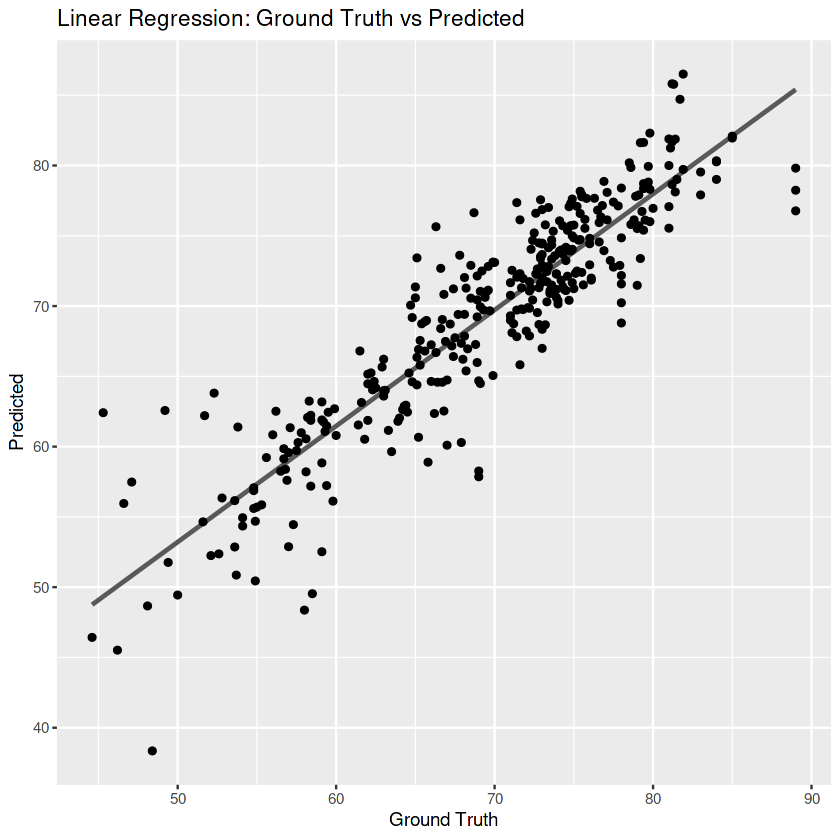

In [27]:
ggplot (data = test, aes (x=Life.expectancy,y=ypred)) +
  geom_smooth(se=F,method = "lm",colour = "gray35") + geom_point() +
  ggtitle('Linear Regression: Ground Truth vs Predicted') +
  xlab('Ground Truth') +
  ylab('Predicted')